# NEWS notebook 1 Cleaning & EDA

In [4]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import spacy
from wordcloud  import STOPWORDS
from datetime import datetime, timedelta
from collections import defaultdict

In [5]:
pd.options.display.max_colwidth = 300

In [6]:
# create a set of stopwords
stopwords = set(STOPWORDS)

In [7]:
stopwords.add('to')
stopwords.add('the')
stopwords.add('a')

In [8]:
# load the data
data = pd.read_csv("C:/Users/Meyke/Documents/news.csv/news.csv")

In [9]:
data.head()

,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,"Fed official says weak data caused by weather, should not slow taper","http://www.latimes.com/business/money/la-fi-mo-federal-reserve-plosser-stimulus-economy-20140310,0,1312750.story\?track=rss",Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,Fed's Charles Plosser sees high bar for change in pace of tapering,http://www.livemint.com/Politics/H2EvwJSK2VE6OF7iK1g3PP/Feds-Charles-Plosser-sees-high-bar-for-change-in-pace-of-ta.html,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,"Fed risks falling 'behind the curve', Charles Plosser says",http://www.ifamagazine.com/news/fed-risks-falling-behind-the-curve-charles-plosser-says-294430,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
3,Fed's Plosser: Nasty Weather Has Curbed Job Growth,http://www.moneynews.com/Economy/federal-reserve-charles-plosser-weather-job-growth/2014/03/10/id/557011,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027
4,Fed's Plosser: Taper pace may be too slow,http://www.marketwatch.com/story/feds-plosser-taper-pace-may-be-too-slow-2014-03-10\?reflink=MW_news_stmp,MarketWatch,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.marketwatch.com,1394470372405


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281876 entries, 0 to 281875
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   TITLE      281876 non-null  object
 1   URL        281876 non-null  object
 2   PUBLISHER  281875 non-null  object
 3   CATEGORY   281876 non-null  object
 4   STORY      281876 non-null  object
 5   HOSTNAME   281876 non-null  object
 6   TIMESTAMP  281876 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 15.1+ MB


In [11]:
# create a readable datetime column
data['DateTime'] = pd.to_datetime(data['TIMESTAMP'], unit='ms')

In [12]:
# First article in dataset, Last article in dataset
data.DateTime.min(), data.DateTime.max()

(Timestamp('2014-03-10 16:52:50.698000'),
 Timestamp('2014-08-28 12:33:11.071000'))

In [13]:
# Length of dataset in days
data.DateTime.max() - data.DateTime.min()

Timedelta('170 days 19:40:20.373000')

In [14]:
# Create two additional columns, one for the month of the year and one for the day of the week
data['month'] = data['DateTime'].dt.month
data['weekday'] = data['DateTime'].dt.weekday

In [15]:
data['weekday_N'] = data.apply(lambda row: 'Monday' if row.weekday == 0 else
                            ('Tuesday' if row.weekday == 1 else
                            ('Wednesday' if row.weekday == 2 else
                            ('Thursday' if row.weekday == 3 else
                            ('Friday' if row.weekday == 4 else
                            ('Saturday' if row.weekday == 5 else 'Sunday'))))), axis=1)

In [16]:
data['month_N'] = data.apply(lambda row: 'Jan' if row.month == 1 else
                            ('Feb' if row.month == 2 else
                            ('Mar' if row.month == 3 else
                            ('Apr' if row.month == 4 else
                            ('May' if row.month == 5 else
                            ('Jun' if row.month == 6 else 
                             ('Jul' if row.month == 7 else
                             ('Aug' if row.month == 8 else
                             ('Sep' if row.month == 9 else
                             ('Oct' if row.month == 10 else
                             ('Nov' if row.month == 11 else 'Dec')))))))))), axis=1)

In [17]:
# Create an additional column with just the date 
data['date'] = [d.date() for d in data['DateTime']]
data['date'] = pd.to_datetime(data['date'])

In [18]:
# Create a new dataframe with 'date' as the index
date = data.set_index('date')

Text(0.5, 0, 'Month')

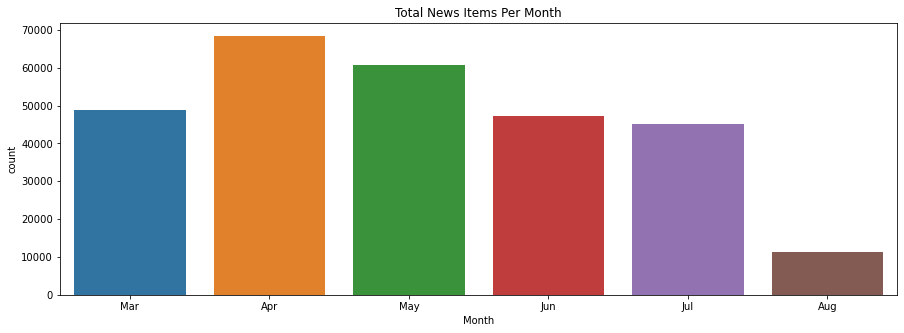

In [19]:
# countplot of the amount of news items per month
order_list = ['Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']
plt.rcParams['figure.figsize'] = (15,5)
sns.countplot(x='month_N', data=data, order=order_list).set(title='Total News Items Per Month')
plt.xlabel("Month")

Text(0.5, 0, 'Weekday')

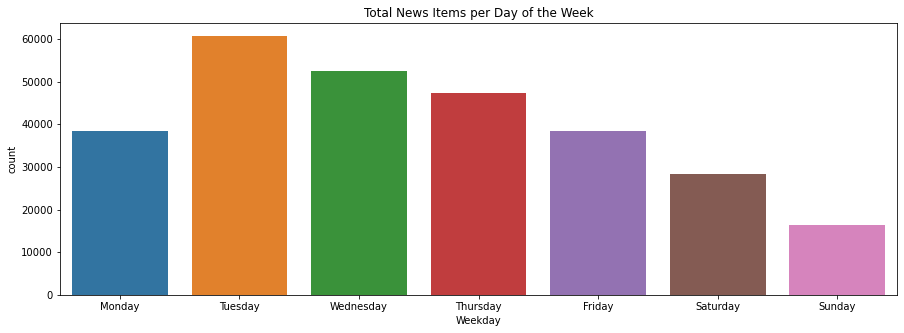

In [20]:
# countplot of the amount of news items per weekday
order_listDay = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(x='weekday_N', data=data, order=order_listDay).set(title="Total News Items per Day of the Week")
plt.xlabel('Weekday')

In [21]:
# Create two dataframes, one with the count of news items per month and the other with the count of days per month
countPerMonth = data.groupby(['month_N'])['TITLE'].count()
daysPerMonth = data.groupby(['month_N'])['date'].nunique()

In [22]:
countPerMonth.to_frame()
daysPerMonth.to_frame()

,date
month_N,
Apr,22
Aug,7
Jul,17
Jun,18
Mar,18
May,23


In [23]:
# combine both dataframes and add a column with the average count of news items per day for each month
result = pd.concat([countPerMonth, daysPerMonth], axis=1)

result['avg_countPerMonth'] = result.apply(lambda row: row.TITLE/row.date, axis=1)
result

,TITLE,date,avg_countPerMonth
month_N,,,
Apr,68407,22,3109.409091
Aug,11371,7,1624.428571
Jul,45228,17,2660.470588
Jun,47347,18,2630.388889
Mar,48878,18,2715.444444
May,60645,23,2636.739130


Text(0, 0.5, 'count')

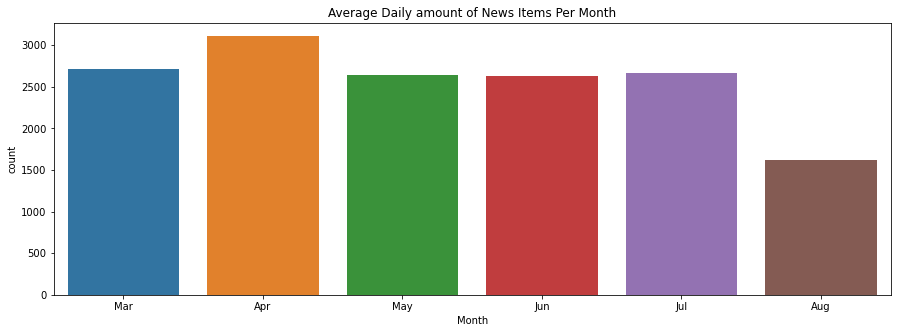

In [24]:
# Barplot of average amount of news items per day for each month
sns.barplot(x=result.index, y='avg_countPerMonth', data=result, order=order_list).set(title="Average Daily amount of News Items Per Month")
plt.xlabel("Month")
plt.ylabel("count")

In [25]:
# Create a dataframe with the count of news items per day
itemsPerDay = date['TITLE'].resample('D').count()

In [26]:
itemsPerDay = itemsPerDay.to_frame()

In [27]:
itemsPerDay.head()

,TITLE
date,
2014-03-10,740
2014-03-11,2866
2014-03-12,1970
2014-03-13,2741
2014-03-14,0


Text(0.5, 1.0, 'Count of News Items')

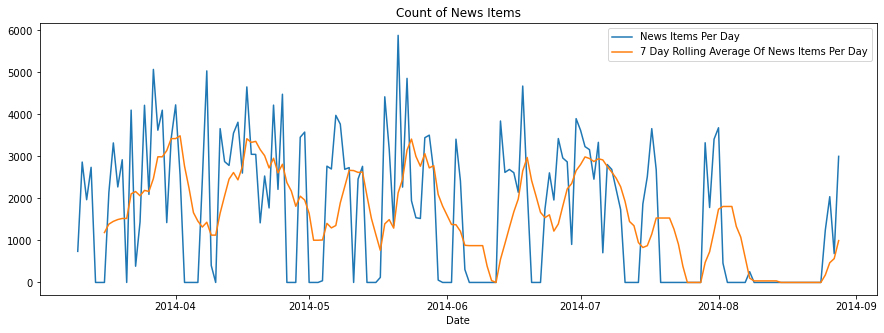

In [28]:
plt.plot(itemsPerDay, label='News Items Per Day')
plt.plot(itemsPerDay.rolling(window = 7).mean(), label='7 Day Rolling Average Of News Items Per Day')
plt.xlabel('Date')
plt.legend()
plt.title('Count of News Items')

Text(0.5, 1.0, 'Count of News Items Per Category')

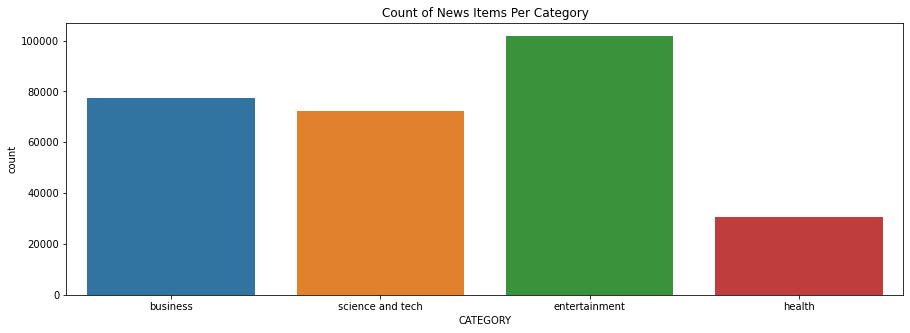

In [29]:
# Check the balance of CATEGORY
ax = sns.countplot(x='CATEGORY', data=data)
labels = ['business', 'science and tech', 'entertainment', 'health']
ax.set_xticklabels(labels)
ax.set_title('Count of News Items Per Category')
# b = business
# t = science and tech
# e = entertainment
# m = health

Text(0.5, 1.0, 'Count of News Items Per Day Per Category')

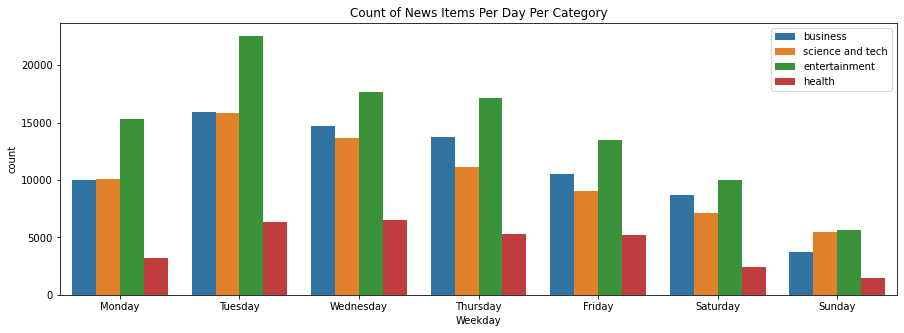

In [30]:
# Check Category per day
sns.countplot(x='weekday_N', data=data, order=order_listDay, hue='CATEGORY')
plt.legend(labels=['business', 'science and tech', 'entertainment', 'health'])
plt.xlabel('Weekday')
plt.title('Count of News Items Per Day Per Category')

### EDA on Titles

In [31]:
# Load English tokenizer, tagger, parser and NER
nlp = spacy.load('en_core_web_md')

In [32]:
# Function to preprocess text and create a column of lemmatized tweets
def preprocess(text):
    # Create Doc object
    doc = nlp(text, disable=['ner', 'parser'])
    # Generate lemmas
    lemmas = [token.lemma_ for token in doc]
    # Remove stopwords and non-alphabetic characters
    a_lemmas = [lemma for lemma in lemmas 
            if lemma.isalpha() and lemma not in stopwords]
    return ' '.join(a_lemmas)
  
# Apply preprocess to text
data['transcript'] = data['TITLE'].apply(preprocess)
data.head()

,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP,DateTime,month,weekday,weekday_N,month_N,date,transcript
0,"Fed official says weak data caused by weather, should not slow taper","http://www.latimes.com/business/money/la-fi-mo-federal-reserve-plosser-stimulus-economy-20140310,0,1312750.story\?track=rss",Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698,2014-03-10 16:52:50.698,3,0,Monday,Mar,2014-03-10,Fed official say weak datum cause weather slow taper
1,Fed's Charles Plosser sees high bar for change in pace of tapering,http://www.livemint.com/Politics/H2EvwJSK2VE6OF7iK1g3PP/Feds-Charles-Plosser-sees-high-bar-for-change-in-pace-of-ta.html,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207,2014-03-10 16:52:51.207,3,0,Monday,Mar,2014-03-10,Fed Charles Plosser see high bar change pace taper
2,"Fed risks falling 'behind the curve', Charles Plosser says",http://www.ifamagazine.com/news/fed-risks-falling-behind-the-curve-charles-plosser-says-294430,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793,2014-03-10 16:52:51.793,3,0,Monday,Mar,2014-03-10,Fed risk fall behind curve Charles Plosser say
3,Fed's Plosser: Nasty Weather Has Curbed Job Growth,http://www.moneynews.com/Economy/federal-reserve-charles-plosser-weather-job-growth/2014/03/10/id/557011,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027,2014-03-10 16:52:52.027,3,0,Monday,Mar,2014-03-10,Fed Plosser Nasty Weather Curbed Job growth
4,Fed's Plosser: Taper pace may be too slow,http://www.marketwatch.com/story/feds-plosser-taper-pace-may-be-too-slow-2014-03-10\?reflink=MW_news_stmp,MarketWatch,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.marketwatch.com,1394470372405,2014-03-10 16:52:52.405,3,0,Monday,Mar,2014-03-10,Fed Plosser taper pace may slow


In [33]:
# Check empty transcript rows and check the reason
data[data['transcript']=='']

,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP,DateTime,month,weekday,weekday_N,month_N,date,transcript
11992,From ColumbusAlive.com,http://www.dispatch.com/content/stories/business/2014/03/17/new-gm-recall-airbags.html,Columbus Dispatch,t,d6-icvZPxWpK-tMtoEJwvm4TfcLjM,www.dispatch.com,1395162033561,2014-03-18 17:00:33.561,3,1,Tuesday,Mar,2014-03-18,
14510,How-To,http://www.pcadvisor.co.uk/how-to/gadget/3507451/how-set-up-chromecast/,PC Advisor,t,dRuzABtOXMAFl_M9gciZy6UH4Pl9M,www.pcadvisor.co.uk,1395233634163,2014-03-19 12:53:54.163,3,2,Wednesday,Mar,2014-03-19,
15066,'Glee'-Cap: '100',http://thecelebritycafe.com/feature/2014/03/glee-cap-100,TheCelebrityCafe.com,e,dpPVrXeXAE9Q5PMVQT3HBD-BOy2iM,thecelebritycafe.com,1395236486576,2014-03-19 13:41:26.576,3,2,Wednesday,Mar,2014-03-19,
17291,From ColumbusAlive.com,http://www.dispatch.com/content/stories/business/2014/03/19/0319-US-announces-$1-2B-Toyota-settlement.html,Columbus Dispatch,t,dhtt6e_rEUbtXXMK83zozijEyPzbM,www.dispatch.com,1395324852790,2014-03-20 14:14:12.790,3,3,Thursday,Mar,2014-03-20,
28898,From ColumbusAlive.com,http://www.dispatch.com/content/stories/national_world/2014/03/25/nwr-top-0325-gh6rmvv4-1.html,Columbus Dispatch,e,dK4EnZnGlZVkYmMDoWP7Xcd1kcgsM,www.dispatch.com,1395779574694,2014-03-25 20:32:54.694,3,1,Tuesday,Mar,2014-03-25,
29774,From ColumbusAlive.com,http://www.dispatch.com/content/stories/business/2014/03/25/0325-Wal-Mart-recalling-174000-dolls-over-burn-risk.html,Columbus Dispatch,b,detY5fIbUMi730MTruKkyGvQuGn5M,www.dispatch.com,1395827460655,2014-03-26 09:51:00.655,3,2,Wednesday,Mar,2014-03-26,
31468,Also in WSJ.com:,http://stream.wsj.com/story/latest-headlines/SS-2-63399/SS-2-491198/,Wall Street Journal,b,dRJ9R19fkRcqH5M6LHvBUN7uBz8UM,stream.wsj.com,1395879508761,2014-03-27 00:18:28.761,3,3,Thursday,Mar,2014-03-27,
33362,girl-shaves-head-for-cancer-friend.jpg,http://www.pennlive.com/midstate/index.ssf/2014/03/school_votes_to_allow_girl_9_w.html,The Patriot-News,m,d9Ux6UIQ_J7csFM6oyFuNAmfznAqM,www.pennlive.com,1395888812550,2014-03-27 02:53:32.550,3,3,Thursday,Mar,2014-03-27,
33960,Malaysia+jet+search%3A+fresh+clues+but+bad+weather,http://www.staradvertiser.com/news/apnews/international/article/\?ID=6390431,Honolulu Star-Advertiser,b,dpVadm1qDEihw5MU3OBWVruJ22vKM,www.staradvertiser.com,1395948429278,2014-03-27 19:27:09.278,3,3,Thursday,Mar,2014-03-27,
39797,http://pediatrics.about.com/b/2014/03/27/responses-to-the-latest-cdc-report-on ...,http://pediatrics.about.com/b/2014/03/27/responses-to-the-latest-cdc-report-on-autism-prevalence.htm,About - News \& Issues,m,dMPYwYKkTueEQ5MwewRLr9q1Ye6rM,pediatrics.about.com,1396023663120,2014-03-28 16:21:03.120,3,4,Friday,Mar,2014-03-28,


In [34]:
# Clean up some of the Titles
def cleanTitle(text):
    if '/' in text:
        text= text.split('/')[-1]
    text= text.replace('+', ' ')
    text= text.replace('.jpg', ' .jpg')
    text= text.replace('-', ' ')
    text= text.replace('%21', '')
    text= text.replace('%27', '')
    text= text.replace('%2C', '')
    text= text.replace('%3A', '')
    text= text.replace('%24', '')
    text= text.replace('%3F', '')
    text= text.replace("GMaccusedofplaying'Russianroulette'withdrivers'lives", "GM accused of playing 'Russianroulette' withdrivers 'lives'")

    return(text)

In [35]:
data['TITLE'] = data.apply(lambda row: cleanTitle(row.TITLE) if row.transcript == '' else row.TITLE, axis=1)

In [36]:
# Rerun transcript creation
def preprocess(text):
    # Create Doc object
    doc = nlp(text, disable=['ner', 'parser'])
    # Generate lemmas
    lemmas = [token.lemma_ for token in doc]
    # Remove stopwords and non-alphabetic characters
    a_lemmas = [lemma for lemma in lemmas 
            if lemma.isalpha() and lemma not in stopwords]
    return ' '.join(a_lemmas)
  
# Apply preprocess to text
data['transcript'] = data['TITLE'].apply(preprocess)
data.head()

,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP,DateTime,month,weekday,weekday_N,month_N,date,transcript
0,"Fed official says weak data caused by weather, should not slow taper","http://www.latimes.com/business/money/la-fi-mo-federal-reserve-plosser-stimulus-economy-20140310,0,1312750.story\?track=rss",Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698,2014-03-10 16:52:50.698,3,0,Monday,Mar,2014-03-10,Fed official say weak datum cause weather slow taper
1,Fed's Charles Plosser sees high bar for change in pace of tapering,http://www.livemint.com/Politics/H2EvwJSK2VE6OF7iK1g3PP/Feds-Charles-Plosser-sees-high-bar-for-change-in-pace-of-ta.html,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207,2014-03-10 16:52:51.207,3,0,Monday,Mar,2014-03-10,Fed Charles Plosser see high bar change pace taper
2,"Fed risks falling 'behind the curve', Charles Plosser says",http://www.ifamagazine.com/news/fed-risks-falling-behind-the-curve-charles-plosser-says-294430,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793,2014-03-10 16:52:51.793,3,0,Monday,Mar,2014-03-10,Fed risk fall behind curve Charles Plosser say
3,Fed's Plosser: Nasty Weather Has Curbed Job Growth,http://www.moneynews.com/Economy/federal-reserve-charles-plosser-weather-job-growth/2014/03/10/id/557011,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027,2014-03-10 16:52:52.027,3,0,Monday,Mar,2014-03-10,Fed Plosser Nasty Weather Curbed Job growth
4,Fed's Plosser: Taper pace may be too slow,http://www.marketwatch.com/story/feds-plosser-taper-pace-may-be-too-slow-2014-03-10\?reflink=MW_news_stmp,MarketWatch,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.marketwatch.com,1394470372405,2014-03-10 16:52:52.405,3,0,Monday,Mar,2014-03-10,Fed Plosser taper pace may slow


##### Count of words per title

In [37]:
# Create a seperate column with the count of words per title

def countWords(text):
    countWords = len(text.split(' '))
    return(countWords)

# Apply countWords to TITLE
data['countWords'] = data['TITLE'].apply(countWords)
data.head()

,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP,DateTime,month,weekday,weekday_N,month_N,date,transcript,countWords
0,"Fed official says weak data caused by weather, should not slow taper","http://www.latimes.com/business/money/la-fi-mo-federal-reserve-plosser-stimulus-economy-20140310,0,1312750.story\?track=rss",Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698,2014-03-10 16:52:50.698,3,0,Monday,Mar,2014-03-10,Fed official say weak datum cause weather slow taper,12
1,Fed's Charles Plosser sees high bar for change in pace of tapering,http://www.livemint.com/Politics/H2EvwJSK2VE6OF7iK1g3PP/Feds-Charles-Plosser-sees-high-bar-for-change-in-pace-of-ta.html,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207,2014-03-10 16:52:51.207,3,0,Monday,Mar,2014-03-10,Fed Charles Plosser see high bar change pace taper,12
2,"Fed risks falling 'behind the curve', Charles Plosser says",http://www.ifamagazine.com/news/fed-risks-falling-behind-the-curve-charles-plosser-says-294430,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793,2014-03-10 16:52:51.793,3,0,Monday,Mar,2014-03-10,Fed risk fall behind curve Charles Plosser say,9
3,Fed's Plosser: Nasty Weather Has Curbed Job Growth,http://www.moneynews.com/Economy/federal-reserve-charles-plosser-weather-job-growth/2014/03/10/id/557011,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027,2014-03-10 16:52:52.027,3,0,Monday,Mar,2014-03-10,Fed Plosser Nasty Weather Curbed Job growth,8
4,Fed's Plosser: Taper pace may be too slow,http://www.marketwatch.com/story/feds-plosser-taper-pace-may-be-too-slow-2014-03-10\?reflink=MW_news_stmp,MarketWatch,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.marketwatch.com,1394470372405,2014-03-10 16:52:52.405,3,0,Monday,Mar,2014-03-10,Fed Plosser taper pace may slow,8


In [38]:
data.countWords.min(), data.countWords.max()

(1, 21)

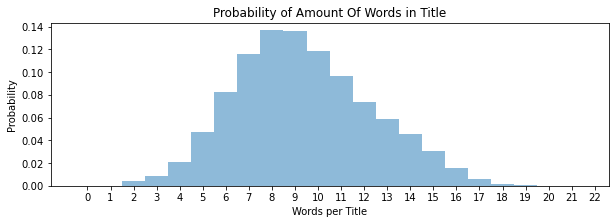

In [39]:
# Probability of word count per Title
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,3)
plt.hist(data['countWords'].to_list(), density=True, bins=np.arange(0, data.countWords.max() + 1.5) -0.5, alpha=0.5)
plt.ylabel('Probability')
plt.xlabel('Words per Title')
plt.xticks(np.arange(0, data.countWords.max() + 1.5))
plt.title('Probability of Amount Of Words in Title')
plt.show()

In [40]:
data.nlargest(5, 'countWords')

,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP,DateTime,month,weekday,weekday_N,month_N,date,transcript,countWords
79354,'I did not kill my wife - I am not a murderer' - Ben Affleck takes centre-stage as first ...,http://www.independent.ie/entertainment/movies/i-did-not-kill-my-wife-i-am-not-a-murderer-ben-affleck-takes-centrestage-as-first-gone-girl-trailer-is-released-30187466.html,Irish Independent,e,dplR3ISnkkn9qbM8zYnygjzuPNkfM,www.independent.ie,1397591807865,2014-04-15 19:56:47.865,4,1,Tuesday,Apr,2014-04-15,I kill wife I murderer Ben Affleck take centre stage first,21
91332,"For the first time, fans can bid on a visit to the set of HBO's Game of Thrones in ...",http://www.hypable.com/2014/04/18/game-of-thrones-creator-auctioning-off-set-visit-for-charity/\?utm_source=rss&amp;utm_medium=rss&amp;utm_campaign=game-of-thrones-creator-auctioning-off-set-visit-for-charity,Hypable,e,dFVFeuMI8YtTrgM1IJ682jjQOmG-M,www.hypable.com,1397892523473,2014-04-19 07:28:43.473,4,5,Saturday,Apr,2014-04-19,first time fan bid visit set HBO Game Thrones,21
182318,"If you have an iPhone, iPad or a Mac, Apple just gave you a ton of nifty stuff to ...",http://www.tampabay.com/blogs/latest-gadgets/apple-unveils-new-os-x-features-at-wwdc/2182540,Tampabay.com \(blog\),t,ddXI9ba1qZ8OCNM9ls1xCgbP5DUlM,www.tampabay.com,1401893739811,2014-06-04 14:55:39.811,6,2,Wednesday,Jun,2014-06-04,iPhone iPad Mac Apple give ton nifty stuff,21
239262,One glass of wine or a beer at the age of 14 could set teenagers on the path to ...,http://www.dailymail.co.uk/health/article-2678079/One-glass-wine-beer-age-14-set-teenagers-path-binge-drinking-new-study-finds.html,Daily Mail,m,d38fEHmL8Y-8aSM8by64-SStksZBM,www.dailymail.co.uk,1404537934706,2014-07-05 05:25:34.706,7,5,Saturday,Jul,2014-07-05,one glass wine beer age set teenager path,21
257169,Dawn of the Planet of the Apes and Rise of the Planet of the Apes: The Art of the ...,http://boingboing.net/2014/07/16/dawn-of-the-planet-of-the-apes.html,Boing Boing,e,dg1oEqkwu3pgVxMlU7dETV69aCIBM,boingboing.net,1405576796374,2014-07-17 05:59:56.374,7,3,Thursday,Jul,2014-07-17,Dawn Planet Apes rise Planet Apes art,21


In [41]:
pd.options.display.max_rows = 4000
pd.set_option('display.max_colwidth', None)

### EDA on URL

In [42]:
# Create a seperate column with the count of letters per url

def countLetters(text):
    countLetters = len(text)
    return(countLetters)

# Apply countLetters to URL
data['countLetters'] = data['URL'].apply(countLetters)
data.head()

,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP,DateTime,month,weekday,weekday_N,month_N,date,transcript,countWords,countLetters
0,"Fed official says weak data caused by weather, should not slow taper","http://www.latimes.com/business/money/la-fi-mo-federal-reserve-plosser-stimulus-economy-20140310,0,1312750.story\?track=rss",Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698,2014-03-10 16:52:50.698,3,0,Monday,Mar,2014-03-10,Fed official say weak datum cause weather slow taper,12,123
1,Fed's Charles Plosser sees high bar for change in pace of tapering,http://www.livemint.com/Politics/H2EvwJSK2VE6OF7iK1g3PP/Feds-Charles-Plosser-sees-high-bar-for-change-in-pace-of-ta.html,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207,2014-03-10 16:52:51.207,3,0,Monday,Mar,2014-03-10,Fed Charles Plosser see high bar change pace taper,12,120
2,"Fed risks falling 'behind the curve', Charles Plosser says",http://www.ifamagazine.com/news/fed-risks-falling-behind-the-curve-charles-plosser-says-294430,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793,2014-03-10 16:52:51.793,3,0,Monday,Mar,2014-03-10,Fed risk fall behind curve Charles Plosser say,9,94
3,Fed's Plosser: Nasty Weather Has Curbed Job Growth,http://www.moneynews.com/Economy/federal-reserve-charles-plosser-weather-job-growth/2014/03/10/id/557011,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027,2014-03-10 16:52:52.027,3,0,Monday,Mar,2014-03-10,Fed Plosser Nasty Weather Curbed Job growth,8,104
4,Fed's Plosser: Taper pace may be too slow,http://www.marketwatch.com/story/feds-plosser-taper-pace-may-be-too-slow-2014-03-10\?reflink=MW_news_stmp,MarketWatch,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.marketwatch.com,1394470372405,2014-03-10 16:52:52.405,3,0,Monday,Mar,2014-03-10,Fed Plosser taper pace may slow,8,105


In [43]:
data.countLetters.min(), data.countLetters.max()

(25, 548)

In [44]:
data.nlargest(5, 'countLetters')

,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP,DateTime,month,weekday,weekday_N,month_N,date,transcript,countWords,countLetters
54996,CBS' 'How I Met Your Mother' finale gets series record audience,http://www.mysask.com/portal/site/main/template.MAXIMIZE/\?javax.portlet.tpst=635b2ff202604ea181fa421740315ae8_ws_MX&amp;javax.portlet.prp_635b2ff202604ea181fa421740315ae8_viewID=story&amp;javax.portlet.prp_635b2ff202604ea181fa421740315ae8_topic_display_name=Entertainment%20News&amp;javax.portlet.prp_635b2ff202604ea181fa421740315ae8_topic_name=Entertainment&amp;javax.portlet.prp_635b2ff202604ea181fa421740315ae8_news_item_id_key=27825389&amp;javax.portlet.begCacheTok=com.vignette.cachetoken&amp;javax.portlet.endCacheTok=com.vignette.cachetoken,mysask.com,e,domgMcN6PevYK4MKxueXWx7XvCHTM,www.mysask.com,1396440475997,2014-04-02 12:07:55.997,4,2,Wednesday,Apr,2014-04-02,CBS I meet Mother finale series record audience,11,548
55147,"Talk show host, ex-football star Michael Strahan to join 'Good Morning America ...",http://www.mysask.com/portal/site/main/template.MAXIMIZE/\?javax.portlet.tpst=635b2ff202604ea181fa421740315ae8_ws_MX&amp;javax.portlet.prp_635b2ff202604ea181fa421740315ae8_viewID=story&amp;javax.portlet.prp_635b2ff202604ea181fa421740315ae8_topic_display_name=Entertainment%20News&amp;javax.portlet.prp_635b2ff202604ea181fa421740315ae8_topic_name=Entertainment&amp;javax.portlet.prp_635b2ff202604ea181fa421740315ae8_news_item_id_key=27827606&amp;javax.portlet.begCacheTok=com.vignette.cachetoken&amp;javax.portlet.endCacheTok=com.vignette.cachetoken,mysask.com,e,domnbUVtvAoMgVMwt_KXJHrQKHZSM,www.mysask.com,1396442021212,2014-04-02 12:33:41.212,4,2,Wednesday,Apr,2014-04-02,talk show host ex football star Michael Strahan join Good Morning America,14,548
140172,"Asked about video that appears to show Solange attacking Jay Z, NYC hotel ...",http://www.mysask.com/portal/site/main/template.MAXIMIZE/\?javax.portlet.tpst=635b2ff202604ea181fa421740315ae8_ws_MX&amp;javax.portlet.prp_635b2ff202604ea181fa421740315ae8_viewID=story&amp;javax.portlet.prp_635b2ff202604ea181fa421740315ae8_topic_display_name=Entertainment%20News&amp;javax.portlet.prp_635b2ff202604ea181fa421740315ae8_topic_name=Entertainment&amp;javax.portlet.prp_635b2ff202604ea181fa421740315ae8_news_item_id_key=28338728&amp;javax.portlet.begCacheTok=com.vignette.cachetoken&amp;javax.portlet.endCacheTok=com.vignette.cachetoken,mysask.com,e,dku0uRoeehpC9JM1RoZ4n0fg8cyoM,www.mysask.com,1399983361383,2014-05-13 12:16:01.383,5,1,Tuesday,May,2014-05-13,ask video appear show Solange attack Jay Z NYC hotel,15,548
143414,CANNES WATCH: Rita Ora hoping enjoy more of Cannes on return after ...,http://www.mysask.com/portal/site/main/template.MAXIMIZE/\?javax.portlet.tpst=635b2ff202604ea181fa421740315ae8_ws_MX&amp;javax.portlet.prp_635b2ff202604ea181fa421740315ae8_viewID=story&amp;javax.portlet.prp_635b2ff202604ea181fa421740315ae8_topic_display_name=Entertainment%20News&amp;javax.portlet.prp_635b2ff202604ea181fa421740315ae8_topic_name=Entertainment&amp;javax.portlet.prp_635b2ff202604ea181fa421740315ae8_news_item_id_key=28402293&amp;javax.portlet.begCacheTok=com.vignette.cachetoken&amp;javax.portlet.endCacheTok=com.vignette.cachetoken,mysask.com,e,dNchJTA1HXB0tXM99hv34_EJbEy8M,www.mysask.com,1400397321648,2014-05-18 07:15:21.648,5,6,Sunday,May,2014-05-18,CANNES WATCH Rita Ora hope enjoy Cannes return,14,548
164472,Matt Bomer says 'The Normal Heart' likely saved his life; hopes teens see film,http://www.mysask.com/portal/site/main/template.MAXIMIZE/\?javax.portlet.tpst=635b2ff202604ea181fa421740315ae8_ws_MX&amp;javax.portlet.prp_635b2ff202604ea181fa421740315ae8_viewID=story&amp;javax.portlet.prp_635b2ff202604ea181fa421740315ae8_topic_display_name=Entertainment%20News&amp;javax.portlet.prp_635b2ff202604ea181fa421740315ae8_topic_name=Entertainment&amp;javax.portlet.prp_635b2ff202604ea181fa421740315ae8_news_item_id_key=28483336&amp;javax.portlet.begCacheTok=com.vignette.cachetoken&amp;javax.portle

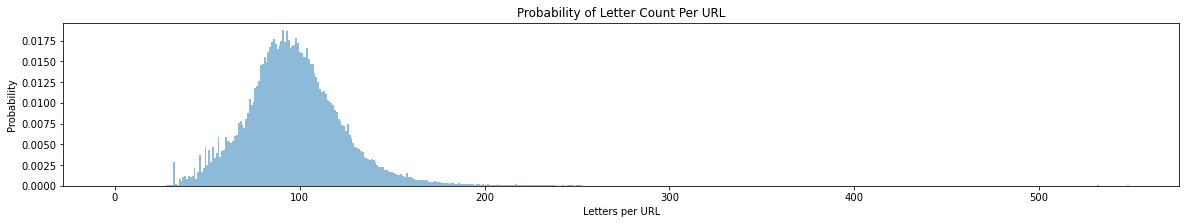

In [45]:
# Probability of letter count per URL
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,3)
plt.hist(data['countLetters'].to_list(), density=True, bins=np.arange(0, data.countLetters.max() + 1.5) -0.5, alpha=0.5)
plt.ylabel('Probability')
plt.xlabel('Letters per URL')
plt.title('Probability of Letter Count Per URL')
plt.show()

### EDA on Publisher

In [46]:
PublisherList = data['PUBLISHER'].unique().tolist()

In [86]:
len(PublisherList)

10051

### EDA on Story

In [47]:
Story = data.groupby(['STORY'])['TITLE'].count()

In [48]:
Story = Story.to_frame()

In [49]:
Story.head()

,TITLE
STORY,
d--2ViHBj27LFNMHCePQDgJyCBjzM,29
d--KGWIac5fEeVM67-ZRRhppFjOSM,17
d--MozT4MsoFfIMgKu5_N58OF_f9M,161
d--XtfmzZ2YqjSMvlrF2EEknl2keM,45
d--wbowLE_mEcaMG2HSlJBQmHDBVM,60


In [50]:
data.groupby(['STORY'])['TITLE'].count().nlargest(10)

STORY
dubwcJArLL_qAKML5LGPLiunKzNLM    300
drWjpn6_UzSkmiM_9qWYJe3-LIGPM    293
dhUefRghWVoxEWM5hK6CWiSBOYw7M    291
d3JRy07lt3ILLKMBvRe1h07zhGLiM    282
dXfATHLvmd9iCUMfMSU3nmTZuv34M    258
d0KY5Cp_CvirIxMwZchYSAKz-UPmM    253
dJQbMcJMikNPqBMYRWteaWPy6-izM    245
dKFdTevl2erb4bMMrI2V7E5Za3Q8M    243
dgYsCPhpELkG3MMVg907LInBJqU3M    239
ddXI9ba1qZ8OCNM9ls1xCgbP5DUlM    228
Name: TITLE, dtype: int64

In [51]:
data['CountStory'] = data.apply(lambda row: Story.loc[row.STORY, 'TITLE'], axis=1)

In [52]:
data.head()

,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP,DateTime,month,weekday,weekday_N,month_N,date,transcript,countWords,countLetters,CountStory
0,"Fed official says weak data caused by weather, should not slow taper","http://www.latimes.com/business/money/la-fi-mo-federal-reserve-plosser-stimulus-economy-20140310,0,1312750.story\?track=rss",Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698,2014-03-10 16:52:50.698,3,0,Monday,Mar,2014-03-10,Fed official say weak datum cause weather slow taper,12,123,6
1,Fed's Charles Plosser sees high bar for change in pace of tapering,http://www.livemint.com/Politics/H2EvwJSK2VE6OF7iK1g3PP/Feds-Charles-Plosser-sees-high-bar-for-change-in-pace-of-ta.html,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207,2014-03-10 16:52:51.207,3,0,Monday,Mar,2014-03-10,Fed Charles Plosser see high bar change pace taper,12,120,6
2,"Fed risks falling 'behind the curve', Charles Plosser says",http://www.ifamagazine.com/news/fed-risks-falling-behind-the-curve-charles-plosser-says-294430,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793,2014-03-10 16:52:51.793,3,0,Monday,Mar,2014-03-10,Fed risk fall behind curve Charles Plosser say,9,94,6
3,Fed's Plosser: Nasty Weather Has Curbed Job Growth,http://www.moneynews.com/Economy/federal-reserve-charles-plosser-weather-job-growth/2014/03/10/id/557011,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027,2014-03-10 16:52:52.027,3,0,Monday,Mar,2014-03-10,Fed Plosser Nasty Weather Curbed Job growth,8,104,6
4,Fed's Plosser: Taper pace may be too slow,http://www.marketwatch.com/story/feds-plosser-taper-pace-may-be-too-slow-2014-03-10\?reflink=MW_news_stmp,MarketWatch,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.marketwatch.com,1394470372405,2014-03-10 16:52:52.405,3,0,Monday,Mar,2014-03-10,Fed Plosser taper pace may slow,8,105,6


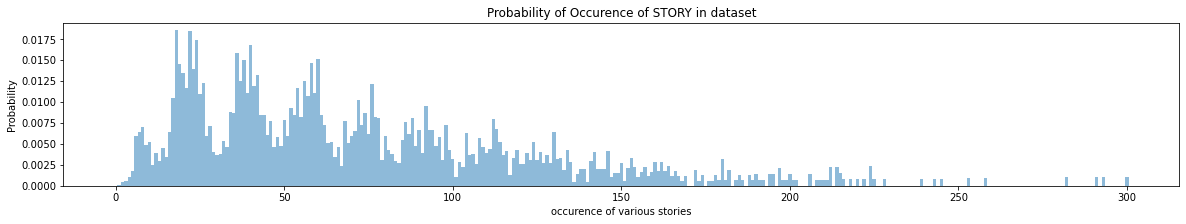

In [53]:
# Probability of occurence of STORY in dataset
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,3)
plt.hist(data['CountStory'].to_list(), density=True, bins=np.arange(0, data.CountStory.max() + 1.5) -0.5, alpha=0.5)
plt.ylabel('Probability')
plt.xlabel('occurence of various stories')
plt.title('Probability of Occurence of STORY in dataset')
plt.show()

In [54]:
data.groupby(['STORY'])['date'].nunique().nlargest(3)

STORY
d1heXVti1gZMY5M5CTXxECCQNMzMM    2
d3UD5mMYa2fs7uMDDiXxRT1-p11FM    2
d5p850MuAIFc0GMNu9teFy8LvwpVM    2
Name: date, dtype: int64

### EDA - NLP on TITLE

##### Average word length

In [55]:
# Create a seperate column with the average word length of the title

# Function to calculate the average length of the words
def preprocess(text):
    counter = 0
    # Create Doc object
    doc = nlp(text, disable=['ner', 'parser'])
    # Generate lemmas
    lemmas = [token.lemma_ for token in doc]
    # Remove non-alphabetic characters
    a_lemmas = [lemma for lemma in lemmas 
            if lemma.isalpha()]
    amountWords = len(a_lemmas)
    for lemma in a_lemmas:
        counter += len(lemma)
    if amountWords == 0:
        return(0)
    else:
        return(counter/amountWords)

# Apply preprocess to text
data['AvgLengthWords'] = data['TITLE'].apply(preprocess)
data.head()

,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP,DateTime,month,weekday,weekday_N,month_N,date,transcript,countWords,countLetters,CountStory,AvgLengthWords
0,"Fed official says weak data caused by weather, should not slow taper","http://www.latimes.com/business/money/la-fi-mo-federal-reserve-plosser-stimulus-economy-20140310,0,1312750.story\?track=rss",Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698,2014-03-10 16:52:50.698,3,0,Monday,Mar,2014-03-10,Fed official say weak datum cause weather slow taper,12,123,6,4.583333
1,Fed's Charles Plosser sees high bar for change in pace of tapering,http://www.livemint.com/Politics/H2EvwJSK2VE6OF7iK1g3PP/Feds-Charles-Plosser-sees-high-bar-for-change-in-pace-of-ta.html,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207,2014-03-10 16:52:51.207,3,0,Monday,Mar,2014-03-10,Fed Charles Plosser see high bar change pace taper,12,120,6,4.083333
2,"Fed risks falling 'behind the curve', Charles Plosser says",http://www.ifamagazine.com/news/fed-risks-falling-behind-the-curve-charles-plosser-says-294430,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793,2014-03-10 16:52:51.793,3,0,Monday,Mar,2014-03-10,Fed risk fall behind curve Charles Plosser say,9,94,6,4.666667
3,Fed's Plosser: Nasty Weather Has Curbed Job Growth,http://www.moneynews.com/Economy/federal-reserve-charles-plosser-weather-job-growth/2014/03/10/id/557011,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027,2014-03-10 16:52:52.027,3,0,Monday,Mar,2014-03-10,Fed Plosser Nasty Weather Curbed Job growth,8,104,6,5.125000
4,Fed's Plosser: Taper pace may be too slow,http://www.marketwatch.com/story/feds-plosser-taper-pace-may-be-too-slow-2014-03-10\?reflink=MW_news_stmp,MarketWatch,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.marketwatch.com,1394470372405,2014-03-10 16:52:52.405,3,0,Monday,Mar,2014-03-10,Fed Plosser taper pace may slow,8,105,6,3.875000


In [56]:
data['AvgLengthWords'].max(), data['AvgLengthWords'].min()

(16.0, 0.0)

In [57]:
#data.nlargest(30, 'AvgLengthWords')

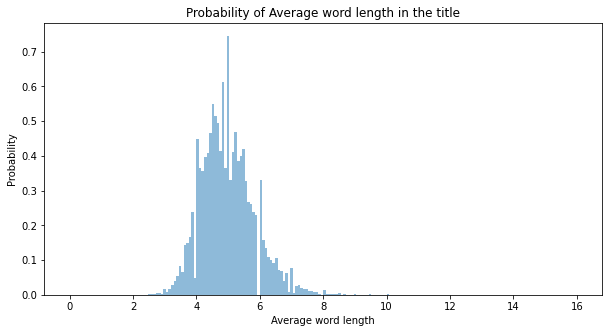

In [58]:
# Probability of average word length in the title
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,5)
plt.hist(data['AvgLengthWords'].to_list(), density=True, bins = 200, alpha=0.5)
plt.ylabel('Probability')
plt.xlabel('Average word length')
plt.title('Probability of Average word length in the title')
plt.show()

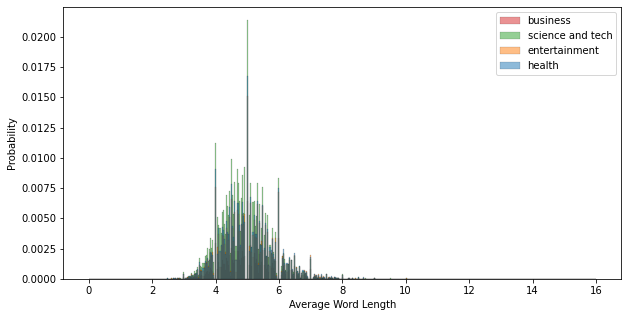

In [59]:
sns.histplot(data=data, x='AvgLengthWords', hue='CATEGORY', stat="probability")
plt.xlabel('Average Word Length')
plt.legend(labels=['business', 'science and tech', 'entertainment', 'health'])

##### Count stopwords

In [60]:
# Create a seperate column with the amount of stopwords per title

# Function to count the amount of stopwords per title 
def preprocess(text):
    counter = 0
    # Create Doc object
    doc = nlp(text, disable=['ner', 'parser'])
    # Generate lemmas
    lemmas = [token.lemma_ for token in doc]
    # get stopwords 
    a_lemmas = [lemma for lemma in lemmas 
            if lemma in stopwords]
    return(len(a_lemmas))
  
# Apply preprocess to text
data['CountStopwords'] = data['TITLE'].apply(preprocess)
data.head()

,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP,DateTime,month,weekday,weekday_N,month_N,date,transcript,countWords,countLetters,CountStory,AvgLengthWords,CountStopwords
0,"Fed official says weak data caused by weather, should not slow taper","http://www.latimes.com/business/money/la-fi-mo-federal-reserve-plosser-stimulus-economy-20140310,0,1312750.story\?track=rss",Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698,2014-03-10 16:52:50.698,3,0,Monday,Mar,2014-03-10,Fed official say weak datum cause weather slow taper,12,123,6,4.583333,3
1,Fed's Charles Plosser sees high bar for change in pace of tapering,http://www.livemint.com/Politics/H2EvwJSK2VE6OF7iK1g3PP/Feds-Charles-Plosser-sees-high-bar-for-change-in-pace-of-ta.html,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207,2014-03-10 16:52:51.207,3,0,Monday,Mar,2014-03-10,Fed Charles Plosser see high bar change pace taper,12,120,6,4.083333,3
2,"Fed risks falling 'behind the curve', Charles Plosser says",http://www.ifamagazine.com/news/fed-risks-falling-behind-the-curve-charles-plosser-says-294430,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793,2014-03-10 16:52:51.793,3,0,Monday,Mar,2014-03-10,Fed risk fall behind curve Charles Plosser say,9,94,6,4.666667,1
3,Fed's Plosser: Nasty Weather Has Curbed Job Growth,http://www.moneynews.com/Economy/federal-reserve-charles-plosser-weather-job-growth/2014/03/10/id/557011,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027,2014-03-10 16:52:52.027,3,0,Monday,Mar,2014-03-10,Fed Plosser Nasty Weather Curbed Job growth,8,104,6,5.125000,1
4,Fed's Plosser: Taper pace may be too slow,http://www.marketwatch.com/story/feds-plosser-taper-pace-may-be-too-slow-2014-03-10\?reflink=MW_news_stmp,MarketWatch,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.marketwatch.com,1394470372405,2014-03-10 16:52:52.405,3,0,Monday,Mar,2014-03-10,Fed Plosser taper pace may slow,8,105,6,3.875000,2


In [61]:
data['CountStopwords'].max(), data['CountStopwords'].min()

(13, 0)

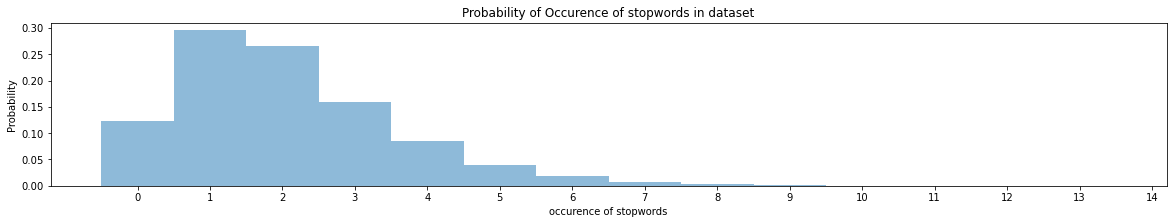

In [62]:
# Probability of occurence of stopwords in dataset
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,3)
plt.hist(data['CountStopwords'].to_list(), density=True, bins=np.arange(0, data.CountStopwords.max() + 1.5) -0.5, alpha=0.5)
plt.ylabel('Probability')
plt.xlabel('occurence of stopwords')
plt.xticks(np.arange(0, data.CountStopwords.max() + 1.5))
plt.title('Probability of Occurence of stopwords in dataset')
plt.show()

##### Count of words that occur in titles

In [63]:
dict_words = defaultdict(int)

In [64]:
# Function to create a dict of all words and keep its occurence count
def preprocess(text):
    # Create Doc object
    doc = nlp(text, disable=['ner', 'parser'])
    # Generate lemmas
    lemmas = [token.lemma_ for token in doc]
    # Remove stopwords and non-alphabetic characters
    a_lemmas = [lemma.lower() for lemma in lemmas 
            if lemma.isalpha() and lemma not in stopwords]
    for lemma in a_lemmas:
        if lemma in dict_words:
            dict_words[lemma] += 1
        else:
            dict_words[lemma] = 1
  
# Apply preprocess to text
data['transcript'].apply(preprocess)


0         None
1         None
2         None
3         None
4         None
          ... 
281871    None
281872    None
281873    None
281874    None
281875    None
Name: transcript, Length: 281876, dtype: object

In [65]:
# Keep words in dict with a count above 9
new_dict = {}
for key, value in dict_words.items():
    if value > 9:
        new_dict[key] = value
word_freq_dict = new_dict

In [66]:
#new_dict

In [67]:
def top_n_scores(n, score_dict):
  lot = [(k,v) for k, v in score_dict.items() if k not in stopwords] #make list of tuple from scores dict
  nl = []
  while len(lot)> 0:
      nl.append(max(lot, key=lambda x: x[1]))
      lot.remove(nl[-1])

  return nl[0:n]


In [68]:
# Get the top 100 words of the entire dataset
TopWordsWholeDataSet = top_n_scores(100, new_dict)

<function matplotlib.pyplot.show(close=None, block=None)>

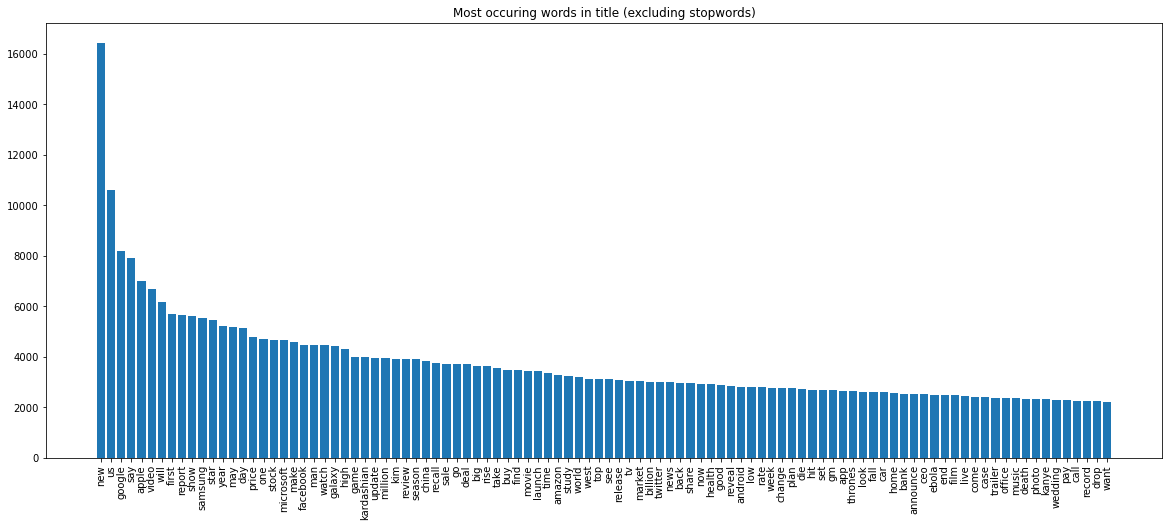

In [69]:
labels, ys = zip(*TopWordsWholeDataSet)
xs = np.arange(len(labels)) 

plt.figure(figsize=(20,8))
plt.bar(xs, ys, align='center')
plt.xticks(xs, labels,rotation=90)
plt.title('Most occuring words in title (excluding stopwords)')
plt.show

##### Count of Nouns (and proper nouns) 

In [70]:
dict_wordsNoun = defaultdict(int)

In [71]:
# Function to create a dict of all NOUNs and keep its occurence count
def preprocessNoun(text):
    # Create Doc object
    doc = nlp(text, disable=['ner', 'parser'])
    # Generate lemmas
    lemmas = [token.lemma_ for token in doc if token.pos_ == 'NOUN' or token.pos_ == 'PROPN']
    # Remove stopwords and non-alphabetic characters
    a_lemmas = [lemma.lower() for lemma in lemmas 
            if lemma.isalpha() and lemma not in stopwords]
    for lemma in a_lemmas:
        if lemma in dict_wordsNoun:
            dict_wordsNoun[lemma] += 1
        else:
            dict_wordsNoun[lemma] = 1
  
# Apply preprocess to text
data['transcript'].apply(preprocessNoun)

0         None
1         None
2         None
3         None
4         None
          ... 
281871    None
281872    None
281873    None
281874    None
281875    None
Name: transcript, Length: 281876, dtype: object

In [72]:
# Get the top 100 nouns of the entire dataset
TopNounsWholeDataSet = top_n_scores(100, dict_wordsNoun)

<function matplotlib.pyplot.show(close=None, block=None)>

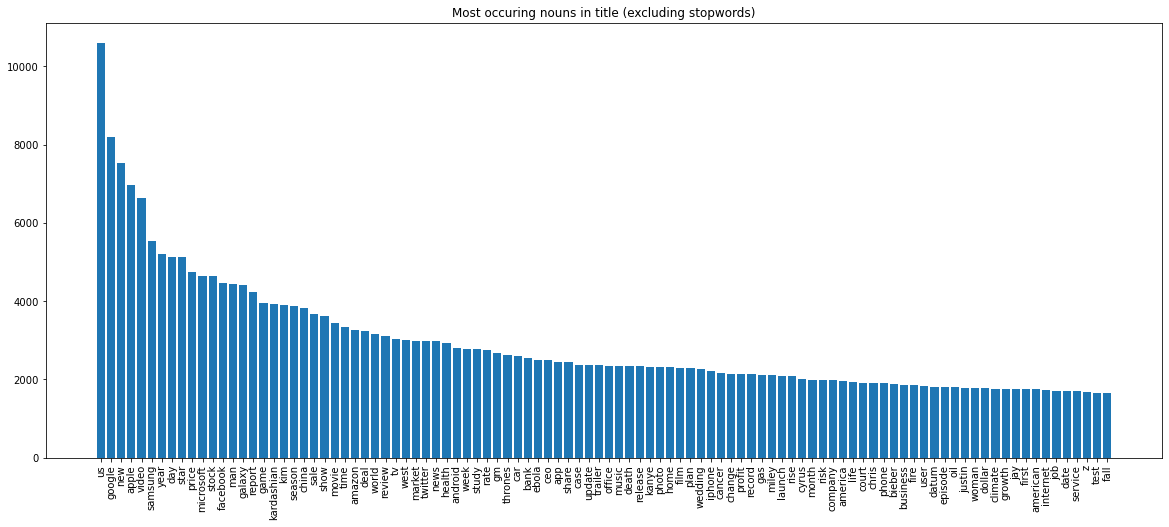

In [73]:
labels, ys = zip(*TopNounsWholeDataSet)
xs = np.arange(len(labels)) 

plt.figure(figsize=(20,8))
plt.bar(xs, ys, align='center')
plt.xticks(xs, labels,rotation=90)
plt.title('Most occuring nouns in title (excluding stopwords)')
plt.show

In [74]:
# Function to create an additional column with all NOUNs
def preprocessNoun(text):
    # Create Doc object
    doc = nlp(text, disable=['ner', 'parser'])
    # Generate lemmas
    lemmas = [token.lemma_ for token in doc if token.pos_ == 'NOUN' or token.pos_ == 'PROPN']
    # Remove stopwords and non-alphabetic characters
    a_lemmas = [lemma.lower() for lemma in lemmas 
            if lemma.isalpha() and lemma not in stopwords]
    return ' '.join(a_lemmas)
  
# Apply preprocess to text
data['nouns'] = data['TITLE'].apply(preprocessNoun)
data.head()

,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP,DateTime,month,weekday,weekday_N,month_N,date,transcript,countWords,countLetters,CountStory,AvgLengthWords,CountStopwords,nouns
0,"Fed official says weak data caused by weather, should not slow taper","http://www.latimes.com/business/money/la-fi-mo-federal-reserve-plosser-stimulus-economy-20140310,0,1312750.story\?track=rss",Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698,2014-03-10 16:52:50.698,3,0,Monday,Mar,2014-03-10,Fed official say weak datum cause weather slow taper,12,123,6,4.583333,3,fed official datum weather taper
1,Fed's Charles Plosser sees high bar for change in pace of tapering,http://www.livemint.com/Politics/H2EvwJSK2VE6OF7iK1g3PP/Feds-Charles-Plosser-sees-high-bar-for-change-in-pace-of-ta.html,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207,2014-03-10 16:52:51.207,3,0,Monday,Mar,2014-03-10,Fed Charles Plosser see high bar change pace taper,12,120,6,4.083333,3,fed charles plosser bar change pace
2,"Fed risks falling 'behind the curve', Charles Plosser says",http://www.ifamagazine.com/news/fed-risks-falling-behind-the-curve-charles-plosser-says-294430,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793,2014-03-10 16:52:51.793,3,0,Monday,Mar,2014-03-10,Fed risk fall behind curve Charles Plosser say,9,94,6,4.666667,1,fed curve charles plosser
3,Fed's Plosser: Nasty Weather Has Curbed Job Growth,http://www.moneynews.com/Economy/federal-reserve-charles-plosser-weather-job-growth/2014/03/10/id/557011,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027,2014-03-10 16:52:52.027,3,0,Monday,Mar,2014-03-10,Fed Plosser Nasty Weather Curbed Job growth,8,104,6,5.125000,1,fed plosser nasty weather curbed job growth
4,Fed's Plosser: Taper pace may be too slow,http://www.marketwatch.com/story/feds-plosser-taper-pace-may-be-too-slow-2014-03-10\?reflink=MW_news_stmp,MarketWatch,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.marketwatch.com,1394470372405,2014-03-10 16:52:52.405,3,0,Monday,Mar,2014-03-10,Fed Plosser taper pace may slow,8,105,6,3.875000,2,fed plosser taper pace


##### Count of verbs

In [75]:
dict_wordsVerb = defaultdict(int)

In [76]:
# Function to create a dict of all NOUNs and keep its occurence count
def preprocessVerb(text):
    # Create Doc object
    doc = nlp(text, disable=['ner', 'parser'])
    # Generate lemmas
    lemmas = [token.lemma_ for token in doc if token.pos_ == 'VERB']
    # Remove stopwords and non-alphabetic characters
    a_lemmas = [lemma.lower() for lemma in lemmas 
            if lemma.isalpha() and lemma not in stopwords]
    for lemma in a_lemmas:
        if lemma in dict_wordsVerb:
            dict_wordsVerb[lemma] += 1
        else:
            dict_wordsVerb[lemma] = 1
  
# Apply preprocess to text
data['transcript'].apply(preprocessVerb)

0         None
1         None
2         None
3         None
4         None
          ... 
281871    None
281872    None
281873    None
281874    None
281875    None
Name: transcript, Length: 281876, dtype: object

In [77]:
# Get the top 100 verbs of the entire dataset
TopVerbsWholeDataSet = top_n_scores(100, dict_wordsVerb)

<function matplotlib.pyplot.show(close=None, block=None)>

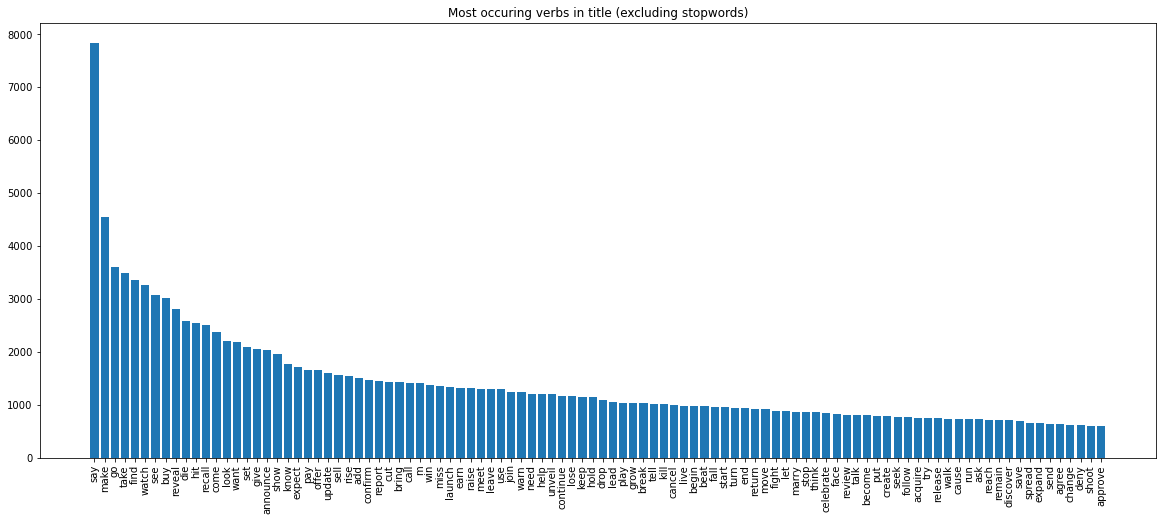

In [78]:
labels, ys = zip(*TopVerbsWholeDataSet)
xs = np.arange(len(labels)) 

plt.figure(figsize=(20,8))
plt.bar(xs, ys, align='center')
plt.xticks(xs, labels,rotation=90)
plt.title('Most occuring verbs in title (excluding stopwords)')
plt.show

In [79]:
# Function to create an additional column with all Verbs
def preprocessVerb(text):
    # Create Doc object
    doc = nlp(text, disable=['ner', 'parser'])
    # Generate lemmas
    lemmas = [token.lemma_ for token in doc if token.pos_ == 'VERB']
    # Remove stopwords and non-alphabetic characters
    a_lemmas = [lemma.lower() for lemma in lemmas 
            if lemma.isalpha() and lemma not in stopwords]
    return ' '.join(a_lemmas)
  
# Apply preprocess to text
data['verbs'] = data['TITLE'].apply(preprocessVerb)
data.head()

,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP,DateTime,month,weekday,...,month_N,date,transcript,countWords,countLetters,CountStory,AvgLengthWords,CountStopwords,nouns,verbs
0,"Fed official says weak data caused by weather, should not slow taper","http://www.latimes.com/business/money/la-fi-mo-federal-reserve-plosser-stimulus-economy-20140310,0,1312750.story\?track=rss",Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698,2014-03-10 16:52:50.698,3,0,...,Mar,2014-03-10,Fed official say weak datum cause weather slow taper,12,123,6,4.583333,3,fed official datum weather taper,say cause slow
1,Fed's Charles Plosser sees high bar for change in pace of tapering,http://www.livemint.com/Politics/H2EvwJSK2VE6OF7iK1g3PP/Feds-Charles-Plosser-sees-high-bar-for-change-in-pace-of-ta.html,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207,2014-03-10 16:52:51.207,3,0,...,Mar,2014-03-10,Fed Charles Plosser see high bar change pace taper,12,120,6,4.083333,3,fed charles plosser bar change pace,see taper
2,"Fed risks falling 'behind the curve', Charles Plosser says",http://www.ifamagazine.com/news/fed-risks-falling-behind-the-curve-charles-plosser-says-294430,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793,2014-03-10 16:52:51.793,3,0,...,Mar,2014-03-10,Fed risk fall behind curve Charles Plosser say,9,94,6,4.666667,1,fed curve charles plosser,risk fall say
3,Fed's Plosser: Nasty Weather Has Curbed Job Growth,http://www.moneynews.com/Economy/federal-reserve-charles-plosser-weather-job-growth/2014/03/10/id/557011,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027,2014-03-10 16:52:52.027,3,0,...,Mar,2014-03-10,Fed Plosser Nasty Weather Curbed Job growth,8,104,6,5.125000,1,fed plosser nasty weather curbed job growth,
4,Fed's Plosser: Taper pace may be too slow,http://www.marketwatch.com/story/feds-plosser-taper-pace-may-be-too-slow-2014-03-10\?reflink=MW_news_stmp,MarketWatch,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.marketwatch.com,1394470372405,2014-03-10 16:52:52.405,3,0,...,Mar,2014-03-10,Fed Plosser taper pace may slow,8,105,6,3.875000,2,fed plosser taper pace,


##### Count of adjectives

In [80]:
dict_wordsAdj = defaultdict(int)

In [81]:
# Function to create a dict of all ADJs and keep its occurence count
def preprocessAdj(text):
    # Create Doc object
    doc = nlp(text, disable=['ner', 'parser'])
    # Generate lemmas
    lemmas = [token.lemma_ for token in doc if token.pos_ == 'ADJ']
    # Remove stopwords and non-alphabetic characters
    a_lemmas = [lemma.lower() for lemma in lemmas 
            if lemma.isalpha() and lemma not in stopwords]
    for lemma in a_lemmas:
        if lemma in dict_wordsAdj:
            dict_wordsAdj[lemma] += 1
        else:
            dict_wordsAdj[lemma] = 1
  
# Apply preprocess to text
data['transcript'].apply(preprocessAdj)

0         None
1         None
2         None
3         None
4         None
          ... 
281871    None
281872    None
281873    None
281874    None
281875    None
Name: transcript, Length: 281876, dtype: object

In [82]:
# Get the top 100 adjectives of the entire dataset
TopAdjWholeDataSet = top_n_scores(100, dict_wordsAdj)

<function matplotlib.pyplot.show(close=None, block=None)>

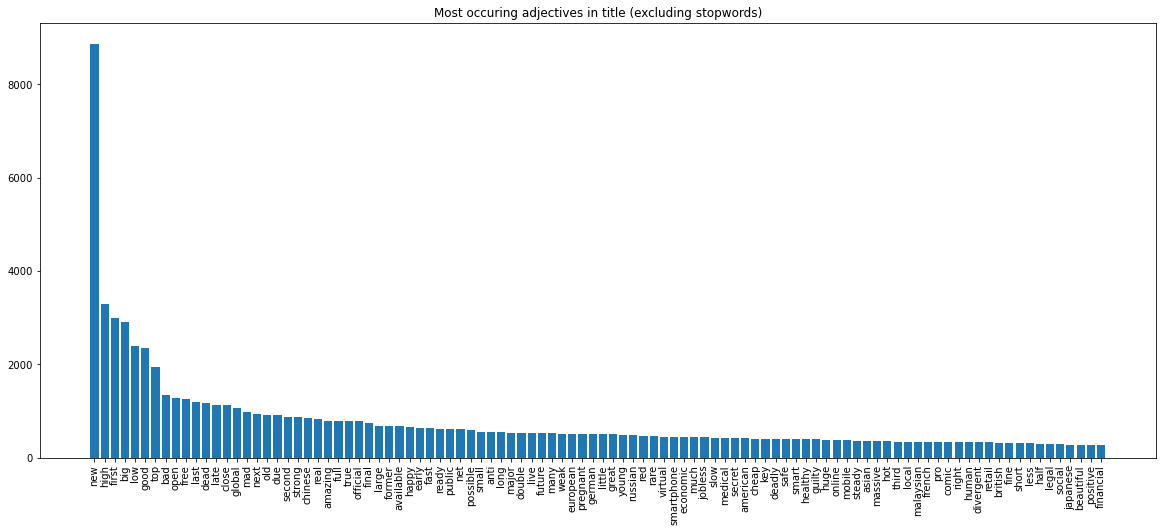

In [83]:
labels, ys = zip(*TopAdjWholeDataSet)
xs = np.arange(len(labels)) 

plt.figure(figsize=(20,8))
plt.bar(xs, ys, align='center')
plt.xticks(xs, labels,rotation=90)
plt.title('Most occuring adjectives in title (excluding stopwords)')
plt.show

In [84]:
# Function to create an additional column with all Adjectives
def preprocessAdj(text):
    # Create Doc object
    doc = nlp(text, disable=['ner', 'parser'])
    # Generate lemmas
    lemmas = [token.lemma_ for token in doc if token.pos_ == 'ADJ']
    # Remove stopwords and non-alphabetic characters
    a_lemmas = [lemma.lower() for lemma in lemmas 
            if lemma.isalpha() and lemma not in stopwords]
    return ' '.join(a_lemmas)
  
# Apply preprocess to text
data['adjectives'] = data['TITLE'].apply(preprocessAdj)
data.head()

,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP,DateTime,month,weekday,...,date,transcript,countWords,countLetters,CountStory,AvgLengthWords,CountStopwords,nouns,verbs,adjectives
0,"Fed official says weak data caused by weather, should not slow taper","http://www.latimes.com/business/money/la-fi-mo-federal-reserve-plosser-stimulus-economy-20140310,0,1312750.story\?track=rss",Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698,2014-03-10 16:52:50.698,3,0,...,2014-03-10,Fed official say weak datum cause weather slow taper,12,123,6,4.583333,3,fed official datum weather taper,say cause slow,weak
1,Fed's Charles Plosser sees high bar for change in pace of tapering,http://www.livemint.com/Politics/H2EvwJSK2VE6OF7iK1g3PP/Feds-Charles-Plosser-sees-high-bar-for-change-in-pace-of-ta.html,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207,2014-03-10 16:52:51.207,3,0,...,2014-03-10,Fed Charles Plosser see high bar change pace taper,12,120,6,4.083333,3,fed charles plosser bar change pace,see taper,high
2,"Fed risks falling 'behind the curve', Charles Plosser says",http://www.ifamagazine.com/news/fed-risks-falling-behind-the-curve-charles-plosser-says-294430,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793,2014-03-10 16:52:51.793,3,0,...,2014-03-10,Fed risk fall behind curve Charles Plosser say,9,94,6,4.666667,1,fed curve charles plosser,risk fall say,
3,Fed's Plosser: Nasty Weather Has Curbed Job Growth,http://www.moneynews.com/Economy/federal-reserve-charles-plosser-weather-job-growth/2014/03/10/id/557011,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027,2014-03-10 16:52:52.027,3,0,...,2014-03-10,Fed Plosser Nasty Weather Curbed Job growth,8,104,6,5.125000,1,fed plosser nasty weather curbed job growth,,
4,Fed's Plosser: Taper pace may be too slow,http://www.marketwatch.com/story/feds-plosser-taper-pace-may-be-too-slow-2014-03-10\?reflink=MW_news_stmp,MarketWatch,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.marketwatch.com,1394470372405,2014-03-10 16:52:52.405,3,0,...,2014-03-10,Fed Plosser taper pace may slow,8,105,6,3.875000,2,fed plosser taper pace,,slow


In [85]:
data.to_csv("C:/Users/Meyke/Documents/news.csv/newsExtended.csv")